<div style="margin: 0 auto; max-width: 800px;">
    <div style="background-image: url('https://i.postimg.cc/CxLmH7bW/Electric-Vehicle-Charging-GIF.gif');
                background-size: contain; /* Changed background size */
                background-repeat: no-repeat; /* Prevent background image from repeating */
                background-position: left; /* Center the background image */
                padding: 50px;
                font-family: Arial, sans-serif; /* Changed font family */
                border: 4px solid #FF5733; /* Changed border color */
                border-radius: 20px;
                color: #DAA03DFF; /* Changed text color */
                text-align: right;
                box-shadow: 0px 8px 15px rgba(0, 0, 0, 0.4);
                animation: fadeIn 2s ease-in-out;">
        <h1 style="font-weight: bold; color: #FF5733;">Delaware EV Adoption Analysis</h1>
        <style>
            @keyframes fadeIn {
                from {
                    opacity: 0;
                }
                to {
                    opacity: 1;
                }
            }
            h1 {
                margin-top: 0;
                font-size: 48px;
                text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.6);
            }
        </style>
    </div>
</div>

<!-- Copyright@ https://www.kaggle.com/abdmental01 -->

![](https://i.postimg.cc/VvtLhXnw/623c78b8169188b933826f7d-Blog-Article.png)

# <a id='step1'></a>
# <div style="background-color:#6b8272;background-size: cover;font-family:tahoma;font-size:175%;text-align:center;border-radius:25px 50px; padding:10px; border:solid 2px #09375b"><span style="color:gold"><b>Step 1 | <b></span><span style="color:#f2f2f2"><b>Library & Configurations</b></span></div>

In [1]:
%%time

# Installing select libraries:-
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages

import re # regular expressions

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

# Set the plot style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")

from datetime import datetime  # Importing the datetime class from the datetime module

from itertools import cycle, combinations  # Igenerating combinations & cycle
from tabulate import tabulate  # Importing tabulate library for formatting tables
from io import StringIO

from scipy import stats # statistical functions

filterwarnings('ignore'); # Ignore warning messages
from IPython.display import display, HTML, display_html, clear_output; # displaying HTML content


clear_output();
print();
collect();


CPU times: user 1.47 s, sys: 462 ms, total: 1.93 s
Wall time: 3 s


In [2]:
class color:
    GRAY = '\033[90m'
    LIGHT_BLUE = '\033[94m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    BOLD = '\033[1m'
    RED = '\033[91m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    MAGENTA = '\033[95m'
    WHITE = '\033[97m'
    BLACK = '\033[30m'
    LIGHT_RED = '\033[91m'
    LIGHT_GREEN = '\033[92m'
    LIGHT_YELLOW = '\033[93m'
    LIGHT_BLUE = '\033[94m'
    LIGHT_MAGENTA = '\033[95m'
    LIGHT_CYAN = '\033[96m'
    LIGHT_WHITE = '\033[97m'
    RESET = '\033[0m'

# Define global styling properties
global_style = {
    "background-color": "#ff4d4d",
    "color": "#e6e6ff",
    "border": "1.5px solid black",
    "font-weight": "bold"
}

In [3]:
# Set the plot style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(10, 10)})
print(f"{color.GREEN}Succesfully Configured libraries!{color.END}")

Succesfully Configured libraries!


# <a id='step1'></a>
# <div style="background-color:#6b8272;background-size: cover;font-family:tahoma;font-size:175%;text-align:center;border-radius:25px 50px; padding:10px; border:solid 2px #09375b"><span style="color:gold"><b>Step 2 | <b></span><span style="color:#f2f2f2"><b>Load Dataset</b></span></div>

In [4]:
%%time

# Error Handling When Loading Dataset with Pandas read_csv

try:
    # Attempt to read the dataset
    df = pd.read_csv('/kaggle/input/delaware-electric-vehicle-charging-station-rebate/delaware_ev_charging_rebates.csv')
    print(f"{color.GREEN}Dataset loaded successfully.{color.END}")
    
except FileNotFoundError:
    # Handle FileNotFoundError if the file does not exist
    print(f"{color.RED}Error: File not found. Please check the file path.{color.END}")

except Exception as e:
    # Handle other exceptions
    print(f"{color.RED}An error occurred while loading the dataset: {e}{color.END}")

print(color.BLUE)
collect();

Dataset loaded successfully.

CPU times: user 90.3 ms, sys: 2.43 ms, total: 92.7 ms
Wall time: 113 ms


# <a id='step1'></a>
# <div style="background-color:#6b8272;background-size: cover;font-family:tahoma;font-size:175%;text-align:center;border-radius:25px 50px; padding:10px; border:solid 2px #09375b"><span style="color:gold"><b>Step 3 | <b></span><span style="color:#f2f2f2"><b>Columns formating</b></span></div>

In [5]:
def format_column_name(df):
    # Define a function to format a single column name
    def format_single_column_name(column_name):
        # Replace non-alphanumeric characters with underscores
        column_name = re.sub(r'\W+', '_', column_name)
        # Convert to lowercase
        column_name = column_name.lower()
        # Remove leading or trailing underscores
        column_name = column_name.strip('_')
        return column_name  # Return the modified column name
    
    # Apply format_single_column_name function to each column name
    mapped_names = [format_single_column_name(col) for col in df.columns]
    
    # Create a dictionary mapping original column names to modified column names
    column_mapping = dict(zip(df.columns, mapped_names))
    
    # Rename columns using the mapping
    df = df.rename(columns=column_mapping)
    
    return df

In [6]:
previous_name = df.copy()

# Apply the function to clean column names
df = format_column_name(df)

# Rename columns to lowercase and replace spaces with underscores
renamed_columns = pd.DataFrame({
    'Previous Name': [color.RED + col + color.RESET for col in previous_name.columns],
    'New Name': [color.GREEN + col + color.RESET for col in df.columns]
})

# Pretty print using tabulate for better formatting
print(tabulate(renamed_columns, headers='keys', tablefmt='grid'))

# Apply the function to clean column names
df = format_column_name(df)

+----+--------------------------+--------------------------+
|    | Previous Name            | New Name                 |
+====+==========================+==========================+
|  0 | Award Number             | award_number             |
+----+--------------------------+--------------------------+
|  1 | Month                    | month                    |
+----+--------------------------+--------------------------+
|  2 | Year                     | year                     |
+----+--------------------------+--------------------------+
|  3 | City                     | city                     |
+----+--------------------------+--------------------------+
|  4 | Zip                      | zip                      |
+----+--------------------------+--------------------------+
|  5 | Charging Station Brand   | charging_station_brand   |
+----+--------------------------+--------------------------+
|  6 | County                   | county                   |
+----+------------------

# <a id='step1'></a>
# <div style="background-color:#6b8272;background-size: cover;font-family:tahoma;font-size:175%;text-align:center;border-radius:25px 50px; padding:10px; border:solid 2px #09375b"><span style="color:gold"><b>Step 4 | <b></span><span style="color:#f2f2f2"><b>Attribute Overview</b></span></div>

In [7]:
def display_dataframe_with_custom_header(df, show_head=False):
    # Define global styling properties
    global_style = {
        "background-color": "#2e3440",
        "color": "#FFFF00",
        "border": "1.5px solid black",
        "font-weight": "bold",
        "font-family": "'Courier New', Courier, monospace"  # Use monospace font for table view
    }

    # Add custom text at the top with "Poetsen One" font and wave effect
    header_text = """
    <h2 style='color: #FF5733; font-weight: bold; font-family: "Poetsen One", sans-serif;
                animation: wave 1.5s infinite;'>
        D<span style="color: #FFFF00;">A</span>T<span style="color: #FFFF00;">A</span>FRAME 
        {frame_type} 
    </h2><br>

    <style>
    @keyframes wave {{
        0% {{ transform: rotate(-2deg); }}
        50% {{ transform: rotate(2deg); }}
        100% {{ transform: rotate(-2deg); }}
    }}
    </style>
    """

    if show_head:
        frame_type = "HEAD"  # Change frame type to "HEAD" for head display
    else:
        frame_type = "INFORMATION"  # Default to "INFORMATION" for info display

    header_text = header_text.format(frame_type=frame_type)  # Format the header text

    if show_head:
        # Get the head of the DataFrame
        df_to_display = df.head()

        # Convert head DataFrame to HTML table
        df_html = df_to_display.to_html(index=False, classes='styled-table', header=True)

        # Apply styling to the table
        styled_df = f'''
        <style>
        .styled-table {{
            border-collapse: collapse;
            margin: 25px 0;
            font-size: 0.9em;
            font-family: sans-serif;
            min-width: 400px;
            box-shadow: 0 0 20px rgba(0, 0, 0, 0.15);
        }}
        .styled-table thead th {{
            padding-top: 12px;
            padding-bottom: 12px;
            text-align: left;
            background-color: #2e3440;
            color: ##81a1c1;
            border: 1px solid #ddd;
            font-weight: bold;
        }}
        .styled-table tbody td {{
            padding: 12px 15px;
            border: 1px solid #ddd;
        }}

        .wave-animation {{
            animation: wave 1.5s infinite;
        }}
        </style>
        {header_text}
        {df_html}
        '''
    else:
        # Redirect printed output to a string
        info_output = StringIO()
        with pd.option_context('display.max_info_rows', 1000, 'display.max_info_columns', 1000):
            df.info(buf=info_output)

        # Get the printed info as a string
        info_string = info_output.getvalue()

        # Apply styling to the string
        styled_df = f'''
        {header_text}
        <pre style="{";".join([f"{key}: {value}" for key, value in global_style.items()])};">
        {info_string}
        </pre>
        '''

    # Google Fonts link
    google_fonts_link = "<link href='https://fonts.googleapis.com/css2?family=Poetsen+One&display=swap' rel='stylesheet'>"

    # HTML content including Google Fonts link and styled DataFrame
    html_content = f'''
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Dataframe Information</title>
        {google_fonts_link}
    </head>
    <body>
        {styled_df}
    </body>
    </html>
    '''

    # Display HTML content
    display(HTML(html_content))

In [8]:
display_dataframe_with_custom_header(df)  # Display info
display_dataframe_with_custom_header(df, show_head=True)  # Display head

award_number,month,year,city,zip,charging_station_brand,county,cost_of_charging_station,rebate_amount
RCS0618102,6,2018,Hockessin,19707,Tesla,New Castle,500.0,250.0
RCS0618103,6,2018,Wilmington,19802,AeroVironment,New Castle,649.0,324.5
RCS0618104,6,2018,Middletown,19709,ChargePoint,New Castle,674.0,337.0
RCS0618105,6,2018,Bear,19701,Tesla,New Castle,500.0,250.0
RCS0618106,6,2018,Bear,19701,Clipper Creek,New Castle,589.0,294.5


# <a id='step1'></a>
# <div style="background-color:#6b8272;background-size: cover;font-family:tahoma;font-size:175%;text-align:center;border-radius:25px 50px; padding:10px; border:solid 2px #09375b"><span style="color:gold"><b>Step 5 | <b></span><span style="color:#f2f2f2"><b>Missing Value Handling</b></span></div>

In [9]:
def plot_missing_values_heatmap(df):
    # Calculate the sum of missing values excluding the first column
    missing_values_sum = df.isna().iloc[:, 1:].sum()

    # Create a heatmap plot
    plt.figure(figsize=(22, 4), facecolor='silver')
    ax = sns.heatmap(missing_values_sum.to_frame(name='').T.rename(columns=lambda x: x.replace('_', ' ').title()), 
                     cmap=sns.dark_palette("gray", as_cmap=True), annot=True, fmt='0.0f',
                     annot_kws={"fontsize":30, "fontweight": "bold"},  # Adjust font size and weight for annotations
                     linecolor='silver', linewidth=1)

    # Set title and adjust fontsize
    plt.title('Count of Missing Values', fontsize=18, fontweight='bold')

    # Rotate the x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=15, fontweight='bold')

    # Adjust font size and weight of y-axis labels
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, fontweight='bold')

    # Show the plot
    plt.show()

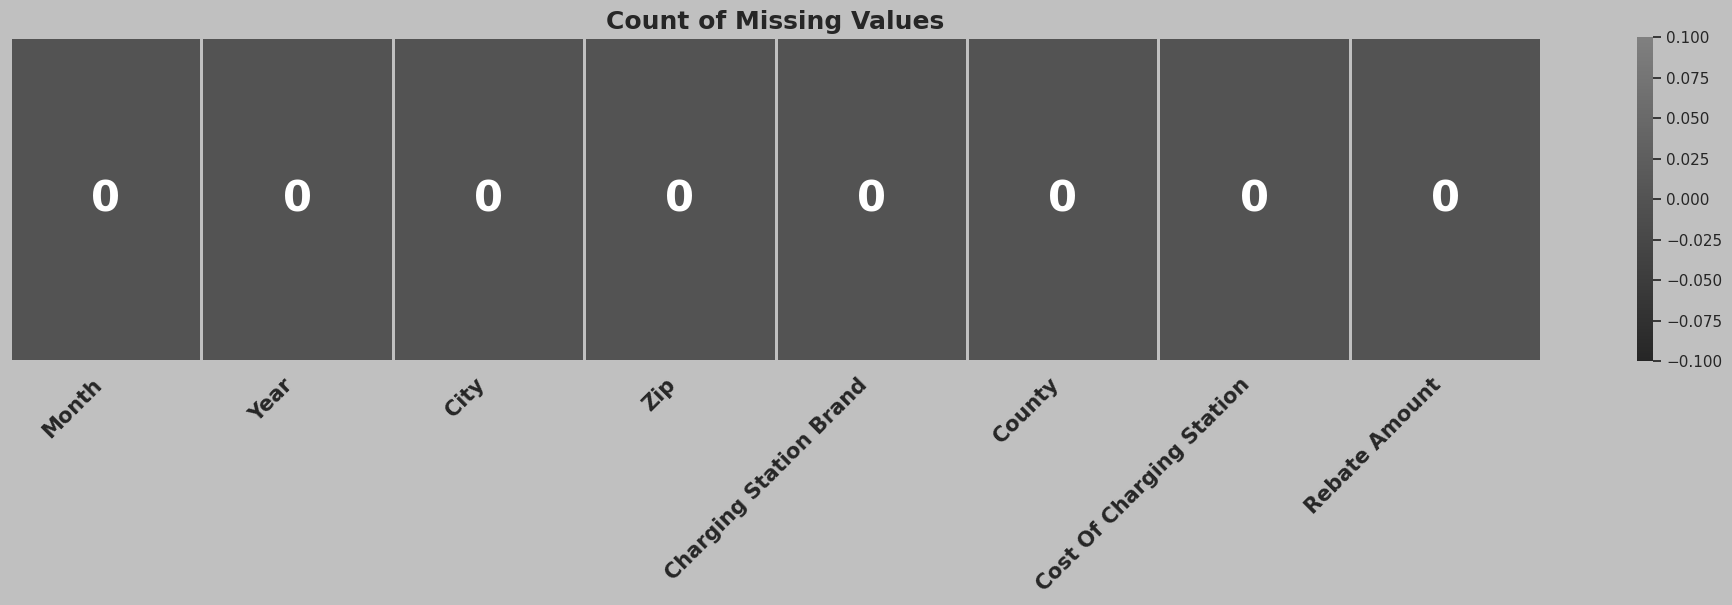

In [10]:
# Call the function to plot the heatmap
plot_missing_values_heatmap(df)

# <a id='step1'></a>
# <div style="background-color:#6b8272;background-size: cover;font-family:tahoma;font-size:175%;text-align:center;border-radius:25px 50px; padding:10px; border:solid 2px #09375b"><span style="color:gold"><b>Step 6 | <b></span><span style="color:#f2f2f2"><b>Duplicate Value Manage</b></span></div>

In [11]:
# Checking the duplicate values in the data
duplicate_values = df.duplicated().sum()
print(color.BLUE + f'The data contains {color.BOLD + color.RED}{duplicate_values}{color.END} {color.BLUE}duplicate values')

The data contains 0 duplicate values


In [12]:
def apply_duplicated_styling(df):
    
    # Define a function to apply font size and color to values
    def apply_style(value):
        if value:
            return 'font-size: 20px; color: red'
        else:
            return 'font-size: 20px; color: green'

    # Define a function to apply font size to column names
    def apply_column_name_style(value):
        return 'font-size: 20px'

    # Transpose the DataFrame and check for duplicated values along the rows
    column_duplicates = df.T.duplicated()

    # Apply styling to the DataFrame containing duplicated values
    styled_column_duplicates = column_duplicates.to_frame().style.applymap(apply_style).background_gradient(axis=0)

    # Apply styling to the column names
    styled_column_duplicates.set_table_styles([{'selector': 'th', 'props': [('font-size', '20px')]}])

    return styled_column_duplicates

In [13]:
# Drop the first column from df
df_without_first_column = df.drop(df.columns[0], axis=1)

# checks for duplicates among the columns of the DataFrame.
styled_df = apply_duplicated_styling(df_without_first_column)
styled_df

,0
month,False
year,False
city,False
zip,False
charging_station_brand,False
county,False
cost_of_charging_station,False
rebate_amount,False


# <a id='step1'></a>
# <div style="background-color:#6b8272;background-size: cover;font-family:tahoma;font-size:175%;text-align:center;border-radius:25px 50px; padding:10px; border:solid 2px #09375b"><span style="color:gold"><b>Step 7 | <b></span><span style="color:#f2f2f2"><b>Statistical Data Summary</b></span></div>

In [14]:
def calculate_statistics(df, opacity=0.5, font_size='17px'):
    # Filter numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    stat = pd.DataFrame()  # Initialize an empty dataframe

    # Measure of central tendency
    stat['Mean'] = numeric_df.mean()  # for mean of all columns
    stat['Median'] = numeric_df.median()  # for median of all columns
    stat['Mode'] = numeric_df.mode().iloc[0]  # for mode of all columns

    # Measure of dispersion
    stat['Range'] = (numeric_df.max() - numeric_df.min())
    stat['Stdev'] = numeric_df.std()
    stat['Variance'] = numeric_df.var()

    # Interquartile range
    stat['IQR'] = [stats.iqr(numeric_df[i]) for i in numeric_df.columns]

    # Quantiles
    stat['25%'] = numeric_df.quantile(q=0.25, axis=0)
    stat['50%'] = numeric_df.quantile(q=0.50, axis=0)
    stat['75%'] = numeric_df.quantile(q=0.75, axis=0)

    # Minimum and maximum
    stat['Min'] = numeric_df.min()
    stat['Max'] = numeric_df.max()

    # Skewness and Kurtosis
    stat['Skewness'] = numeric_df.skew()
    stat['Kurtosis'] = numeric_df.kurt()

    # Transpose the DataFrame
    stat = stat.T

    # Apply the float format
    stat = stat.applymap('{:,.2f}'.format)

    # Apply the background color with transparency
    styled_df = stat.style.apply(lambda x: [f'background: rgba(173, 216, 230, {opacity})' for val in x], axis=1)
    
    # Apply font size
    styled_df = styled_df.set_properties(**{'font-size': font_size})
    
    return styled_df

In [15]:
# Example usage:
# Assuming you have a DataFrame called 'df' and want to set transparency to 0.5
stats_df = calculate_statistics(df, opacity=0.4, font_size='19px')
stats_df

,month,year,zip,cost_of_charging_station,rebate_amount
Mean,7.59,"2,018.73","19,788.18","3,365.28","2,900.20"
Median,8.00,"2,019.00","19,803.00",550.00,299.50
Mode,12.00,"2,019.00","19,711.00",500.00,250.00
Range,11.00,8.00,"13,097.00","76,482.68","48,797.34"
Stdev,3.62,1.87,494.25,"7,003.86","6,631.64"
Variance,13.09,3.49,"244,285.60","49,054,051.05","43,978,708.97"
IQR,6.00,1.00,219.00,"1,099.00",798.50
25%,5.00,"2,018.00","19,711.00",500.00,250.00
50%,8.00,"2,019.00","19,803.00",550.00,299.50
75%,11.00,"2,019.00","19,930.00","1,599.00","1,048.50"


In [16]:
def variable_summary(df, opacity=0.5, font_size='20px'):
    # Initialize an empty list to store individual summaries
    summaries = []

    # Iterate through each column in the DataFrame
    for col in df.columns:
        dtype = df[col].dtype  # Data type of the column
        count = df[col].count()  # Count of non-null values
        unique = df[col].nunique()  # Number of unique values
        missing = df[col].isna().sum()  # Number of missing values

        # Append the summary information to the list
        summaries.append([col, dtype, count, unique, missing])

    # Create a DataFrame from the list of summaries
    summary_df = pd.DataFrame(summaries, columns=['Variable', 'Dtype', 'Count', 'Unique', 'Missing'])

    # Apply background color with opacity
    styled_summary_df = summary_df.style.apply(lambda x: [f'background: rgba(42, 46, 120, {opacity})' for val in x], axis=1)

    # Apply font size to the entire DataFrame
    styled_summary_df.set_table_styles([{'selector': '', 'props': [('font-size', font_size)]}])

    return styled_summary_df

In [17]:
# DataFrame called 'df'
summary_df = variable_summary(df_without_first_column)
summary_df

,Variable,Dtype,Count,Unique,Missing
0,month,int64,717,12,0
1,year,int64,717,9,0
2,city,object,717,43,0
3,zip,int64,717,52,0
4,charging_station_brand,object,717,59,0
5,county,object,717,3,0
6,cost_of_charging_station,float64,717,225,0
7,rebate_amount,float64,717,193,0


# <a id='step1'></a>
# <div style="background-color:#6b8272;background-size: cover;font-family:tahoma;font-size:175%;text-align:center;border-radius:25px 50px; padding:10px; border:solid 2px #09375b"><span style="color:gold"><b>Step 8 | <b></span><span style="color:#f2f2f2"><b>Feature engineering</b></span></div>

In [18]:
def map_to_season(month):
    # Map months to seasons
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"
    
df['season'] = df['month'].apply(map_to_season)

# <a id='step1'></a>
# <div style="background-color:#6b8272;background-size: cover;font-family:tahoma;font-size:175%;text-align:center;border-radius:25px 50px; padding:10px; border:solid 2px #09375b"><span style="color:gold"><b>Step 9 | <b></span><span style="color:#f2f2f2"><b>Exploratory Data Analysis</b></span></div>

<div style="background-color:#eef1fb; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #0A2342">
<center style="font-size: 22px;">_♥_♥_♥ <u>  Exploratory Data Analysis EDA</u> ♥_♥_♥_</center>
<br><br>
<p style="font-family: monospace; font-size: 18px;">
  <strong>EDA</strong> stands for <strong>Exploratory Data Analysis</strong>. It's an approach to analyzing data sets to summarize their main characteristics, often with visual methods. <strong>EDA</strong> is typically performed at the beginning of a data analysis process to understand the data, discover patterns, spot anomalies, and formulate hypotheses for further investigation.
</p>

<p style="font-family: monospace; font-size: 18px;">
  Here's an explanation of the three main types of EDA:
  <br><br>
<p style="font-family: monospace; font-size: 16px;">
  <strong><u>Univariate Analysis:</u></strong> Univariate analysis focuses on examining one variable (or feature) at a time. It helps to understand the distribution, central tendency, and spread of a single variable. Common techniques include histograms, box plots, bar charts, and summary statistics like mean, median, and mode.
  <br><br>
  <strong><u>Bivariate Analysis:</u></strong> Bivariate analysis involves analyzing the relationship between two variables. It helps to understand how one variable changes with respect to another variable. Common techniques include scatter plots, correlation analysis, and cross-tabulation.
  <br><br>
  <strong><u>Multivariate Analysis:</u></strong> Multivariate analysis involves analyzing more than two variables simultaneously. It helps to understand the relationships and interactions between multiple variables. Common techniques include principal component analysis (PCA), factor analysis, and cluster analysis.
  <br><br>
  By performing these types of analysis, data analysts and scientists gain insights into the data, identify patterns, relationships, and outliers, and make informed decisions for further analysis or modeling.
</p>
</div>

In [19]:
class Plotter:
    @staticmethod
    def format_func(value, tick_number):
        if int(value) == value:  # Check if the value is an integer
            return f'{int(value)}'
        else:
            return f'{round(value, 2)}'

    @staticmethod
    def plot_kde_histogram(df, columns, columns_per_row=3):
        
        # Set the seaborn style to remove white grid lines
        sns.set_style("dark")
    
        # Choose a color palette with enough colors for all the columns
        palette = sns.color_palette("dark", len(columns))

        # Calculate the number of rows required based on the number of columns and columns per row
        num_cols = len(columns)
        num_rows = (num_cols - 1) // columns_per_row + 1

        # Create figure and axes
        fig, axs = plt.subplots(num_rows, columns_per_row, figsize=(14, 4.5 * num_rows), facecolor='silver')

        # Flatten axes for easier iteration
        axs = axs.flatten()

        # Set subplot background color
        subplot_color = 'silver'

        # Loop through each numeric column in the dataset
        for i, col in enumerate(columns):
            if i < num_cols:  # Ensure not to exceed the number of columns
                row_index = i // columns_per_row  # Calculate the row index
                col_index = i % columns_per_row   # Calculate the column index

                sns.kdeplot(data=df[col], color=palette[i], fill=True, ax=axs[i])
                axs[i].set(facecolor=subplot_color, ylabel='', xlabel='')  # Set subplot background color

                # Set plot title
                title = col.replace('_', ' ').title()  # Convert column name to title format
                axs[i].set_title(f'KDE - {title}', color=palette[i], fontname='Serif', fontsize=14)

                # Rotate x-axis labels to 90 degrees for better readability
                axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)
                skewness = df[col].skew()
                axs[i].legend(["Skewness: %.2f" % skewness], facecolor='gray')

                # Set custom formatter for x-axis ticks to display integers or floating point numbers
                # axs[i].xaxis.set_major_formatter(FuncFormatter(Plotter.format_func)) 
                # axs[i].yaxis.set_major_formatter(FuncFormatter(Plotter.format_func)) 

        # Hide empty axes if there are fewer columns than the allocated number of subplots
        for j in range(num_cols, num_rows * columns_per_row):
            fig.delaxes(axs[j])

        # Adjust layout
        plt.tight_layout()

        # Show plot
        plt.show()

    @staticmethod
    def plot_hist_histogram(df, columns, columns_per_row=3):
        
        # Set the seaborn style to remove white grid lines
        sns.set_style("dark")
        
        # Choose a color palette with enough colors for all the columns
        palette = sns.color_palette("dark", len(columns))

        # Calculate the number of rows required based on the number of columns and columns per row
        num_cols = len(columns)
        num_rows = (num_cols - 1) // columns_per_row + 1

        # Calculate the actual number of subplots needed based on the number of columns
        num_plots = min(num_cols, columns_per_row * num_rows)

        # Create figure and axes
        fig, axs = plt.subplots(num_rows, columns_per_row, figsize=(14, 4.5 * num_rows), facecolor='silver')

        # Flatten axes for easier iteration
        axs = axs.flatten()

        # Set subplot background color
        subplot_color = 'silver'

        # Loop through each numeric column in the dataset
        for i, col in enumerate(columns):
            if i < num_plots:  # Ensure not to exceed the number of subplots needed
                row_index = i // columns_per_row  # Calculate the row index
                col_index = i % columns_per_row   # Calculate the column index

                sns.histplot(data=df, x=col, color=palette[i], kde=True, bins=round(np.sqrt(len(df))), ax=axs[i])
                axs[i].set(facecolor=subplot_color, ylabel='', xlabel='')  # Set subplot background color

                # Set plot title
                title = col.replace('_', ' ').title()  # Convert column name to title format
                axs[i].set_title(title, color=palette[i], fontname='Serif', fontsize=14)

                # Rotate x-axis labels to 45 degrees
                axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)
                skewness = df[col].skew()
                axs[i].legend(["Skewness: %.2f" % skewness], facecolor='gray')


        # Hide empty axes if there are fewer columns than the allocated number of subplots
        for j in range(num_plots, num_rows * columns_per_row):
            fig.delaxes(axs[j])

        # Adjust layout
        plt.tight_layout()

        # Show plot
        plt.show()

<div style="background-color:#eef1fb; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #0A2342">
    <center style="font-size: 22px; color: Blue;">_♥_♥_♥ <u>  Data Distributions Explained </u> ♥_♥_♥_</center>
    <br><br>
<p style="font-family: monospace; font-size: 18px;">
  <strong>In statistics</strong>, a <strong>distribution</strong> refers to the pattern or spread of values that a variable can take on within a dataset. It describes how the values of a variable are distributed or spread out across different possible outcomes.
</p>
<p style="font-family: monospace; font-size: 16px;">
    <strong><u>Normal Distribution (Gaussian Distribution):</u></strong> A symmetric bell-shaped distribution where the mean, median, and mode are all equal. It is characterized by its mean and standard deviation.
    <br><br>
    <strong><u>Uniform Distribution:</u></strong> A distribution where all values within a specified range have an equal probability of occurring. It is characterized by a constant probability density function over the range.
    <br><br>
    <strong><u>Binomial Distribution:</u></strong> A discrete probability distribution that describes the number of successes in a fixed number of independent Bernoulli trials, each with the same probability of success.
    <br><br>
    <strong><u>Poisson Distribution:</u></strong> A discrete probability distribution that describes the number of events occurring in a fixed interval of time or space, given a constant rate of occurrence and independence between events.
    <br><br>
    <strong><u>Exponential Distribution:</u></strong> A continuous probability distribution that describes the time between events in a Poisson process, where events occur continuously and independently at a constant rate.
    <br><br>
    <strong><u>Gamma Distribution:</u></strong> A continuous probability distribution that generalizes the exponential distribution and describes the time until the nth event in a Poisson process.
    <br><br>
    <strong><u>Chi-Square Distribution:</u></strong> A continuous probability distribution that arises in the context of hypothesis testing and describes the distribution of the sum of squared standard normal deviates.
    <br><br>
    <strong><u>Student's t-Distribution:</u></strong> A continuous probability distribution that is similar in shape to the normal distribution but has heavier tails. It is commonly used in hypothesis testing when the sample size is small and the population standard deviation is unknown.
    <br><br>
    These are just a few examples of the many types of distributions used in statistics and probability theory. Each distribution has its own mathematical formulation, properties, and applications in various fields such as science, engineering, finance, and more.
  </p>
</p>

<p style="font-family: monospace; font-size: 18px;">
  Left skew and right skew are terms used to describe the shape of the distribution of data points in a histogram or probability density plot.
  <br><br>
  <strong><u>Left Skew (Negative Skew):</u></strong> A distribution is left-skewed if the left tail (the side with smaller values) is longer or stretched out compared to the right tail. This means that the majority of the data points are concentrated on the right side of the distribution, while a few extreme values pull the mean towards the left. The mean is typically less than the median in a left-skewed distribution.
  <br><br>
  <strong><u>Right Skew (Positive Skew):</u></strong> A distribution is right-skewed if the right tail (the side with larger values) is longer or stretched out compared to the left tail. This means that the majority of the data points are concentrated on the left side of the distribution, while a few extreme values pull the mean towards the right. The mean is typically greater than the median in a right-skewed distribution.
</p>
</div>

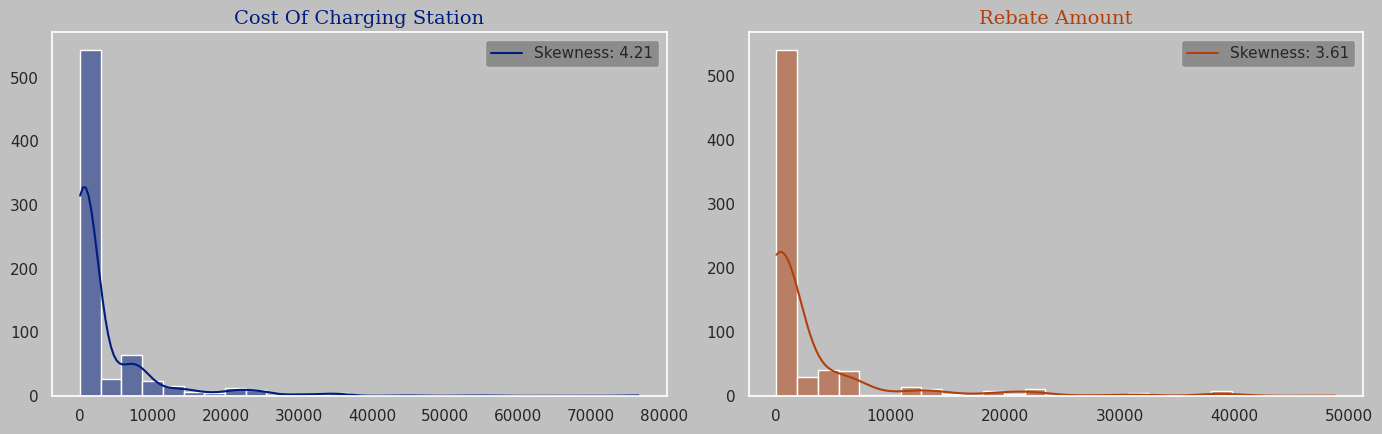

In [20]:
columns = ['cost_of_charging_station','rebate_amount']
Plotter.plot_hist_histogram(df, columns, columns_per_row=2)

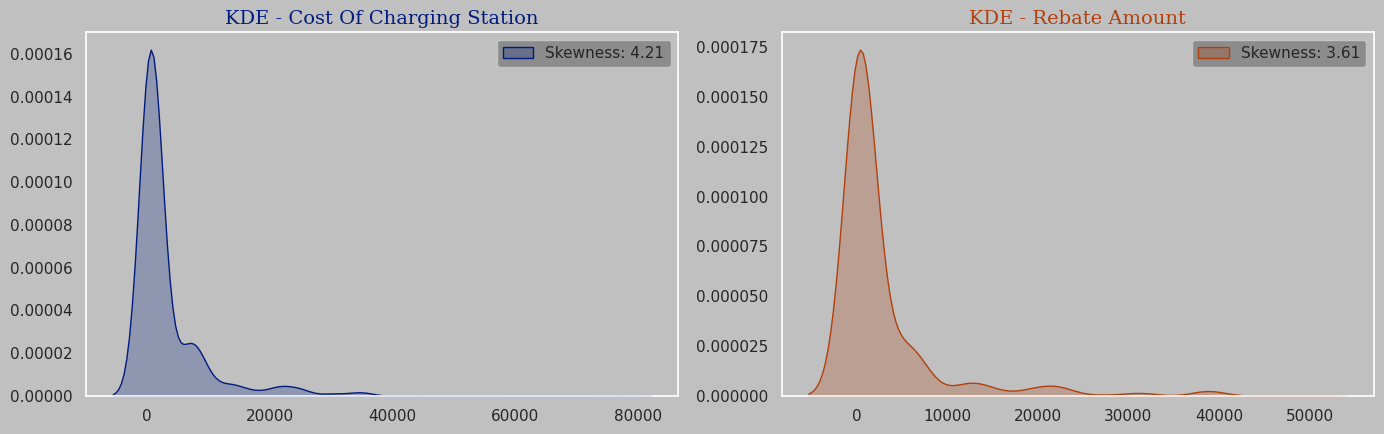

In [21]:
Plotter.plot_kde_histogram(df, columns, columns_per_row=2)

In [22]:
def plot_scatter_by_category(df, x_column, y_column, category_columns, title):
    # Create a color palette for each unique category in all category columns
    num_categories = sum(df[column].nunique() for column in category_columns)
    category_palette = sns.color_palette("husl", num_categories)

    # Create figure and axes objects
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharex=True, sharey=True, facecolor='silver')

    # Scatter plot by category columns
    for i, column in enumerate(category_columns):
        categories = df[column].unique()
        for j, category in enumerate(categories):
            axes[i].scatter(df[x_column][df[column] == category], 
                            df[y_column][df[column] == category], 
                            label=f'{category}', 
                            color=category_palette[j])

        # Set labels and title for the subplot
        axes[i].set_xlabel(x_column.title())
        axes[i].set_ylabel(y_column.title())
        axes[i].set_title(title)
        # Show legend for the entire plot
        axes[i].legend(title=category_columns[i].title(), facecolor='gray')



    # Show plot
    plt.tight_layout()
    plt.show()

In [23]:
def plot_brand_distribution(df, columns, subplot_color='silver', custom_palettes=None):
    default_palettes = ["Set1", "husl", "Paired", "Set2", "Set3", "coolwarm", "pastel", "colorblind"]
    
    if custom_palettes is None:
        custom_palettes = default_palettes
    elif not isinstance(custom_palettes, list):
        raise ValueError("custom_palettes must be a list of palette names")
    
    for column_name, palette_name in zip(columns, cycle(custom_palettes)):
        # Calculate the counts of each column
        column_counts = df[column_name].value_counts()

        # Get the custom color palette for the current column
        custom_palette = sns.color_palette(palette_name)

        # Plotting
        fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor=subplot_color)

        # Countplot for the distribution of the column
        sns.countplot(data=df, x=column_name, ax=axes[0], palette=custom_palette)
        axes[0].set_xlabel(column_name.replace('_', ' ').title())
        axes[0].set_ylabel('Count')
        axes[0].set_facecolor(subplot_color)  # Set subplot background color

        # Pie chart for the distribution of the column
        axes[1].pie(column_counts.values, labels=column_counts.index, autopct='%1.2f%%', colors=custom_palette)
        axes[1].set_facecolor(subplot_color)  # Set subplot background color

        # Set titles for the column plots
        title_color = sns.color_palette("Set1")[0]
        axes[0].set_title(f'Distribution of {column_name.replace("_", " ").title()}', color=title_color)
        axes[1].set_title(f'Distribution of {column_name.replace("_", " ").title()}', color=title_color)

        # Set the super title color to the first color of the colorblind palette
        suptitle_color = sns.color_palette("colorblind")[0]

        plt.suptitle(f'Analysis of {column_name.replace("_", " ").title()} Distribution', fontsize=16, color=suptitle_color)

        # Adjust layout
        plt.tight_layout()

        # Show the plot
        plt.show()

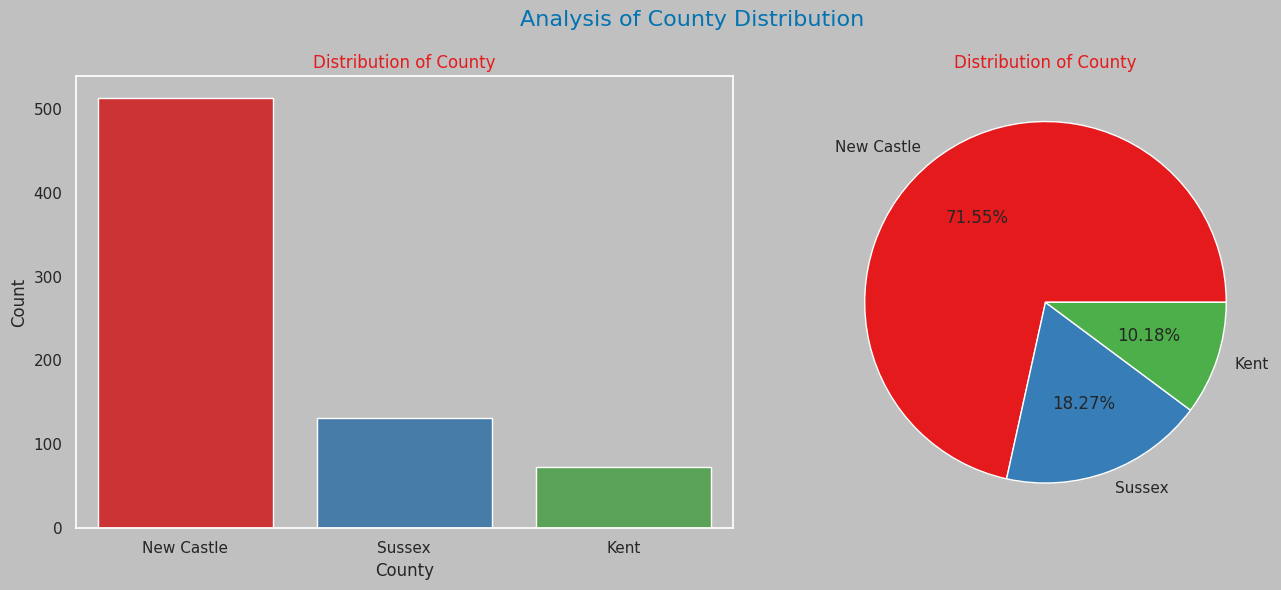

In [24]:
plot_brand_distribution(df, columns=['county'])

In [25]:
def plot_category_count(df, column_name, title='', facecolor='silver', palette='dark'):
    # Calculate the count of each category
    category_counts = df[column_name].value_counts()

    # Get the index of categories sorted by count in ascending order
    sorted_categories = category_counts.index

    # Set the background color
    sns.set_style(rc={'axes.facecolor': facecolor})

    # Convert palette to a list if it's a string
    if isinstance(palette, str):
        palette = sns.color_palette(palette, len(sorted_categories))

    # Plotting
    plt.figure(figsize=(14, 6), facecolor=facecolor)
    ax = sns.countplot(data=df, x=column_name, order=sorted_categories, palette=palette)

    # Set the column name labels' color based on the palette
    num_colors = len(palette)
    for i, label in enumerate(ax.get_xticklabels()):
        label.set_color(palette[i % num_colors])

    plt.xlabel(column_name.replace('_', ' ').title())
    plt.xticks(rotation=90)
    plt.title(title, pad=20, fontsize=18, color='#FF5733', fontname='Calibri', fontweight='bold')  # Set the title
    plt.show()

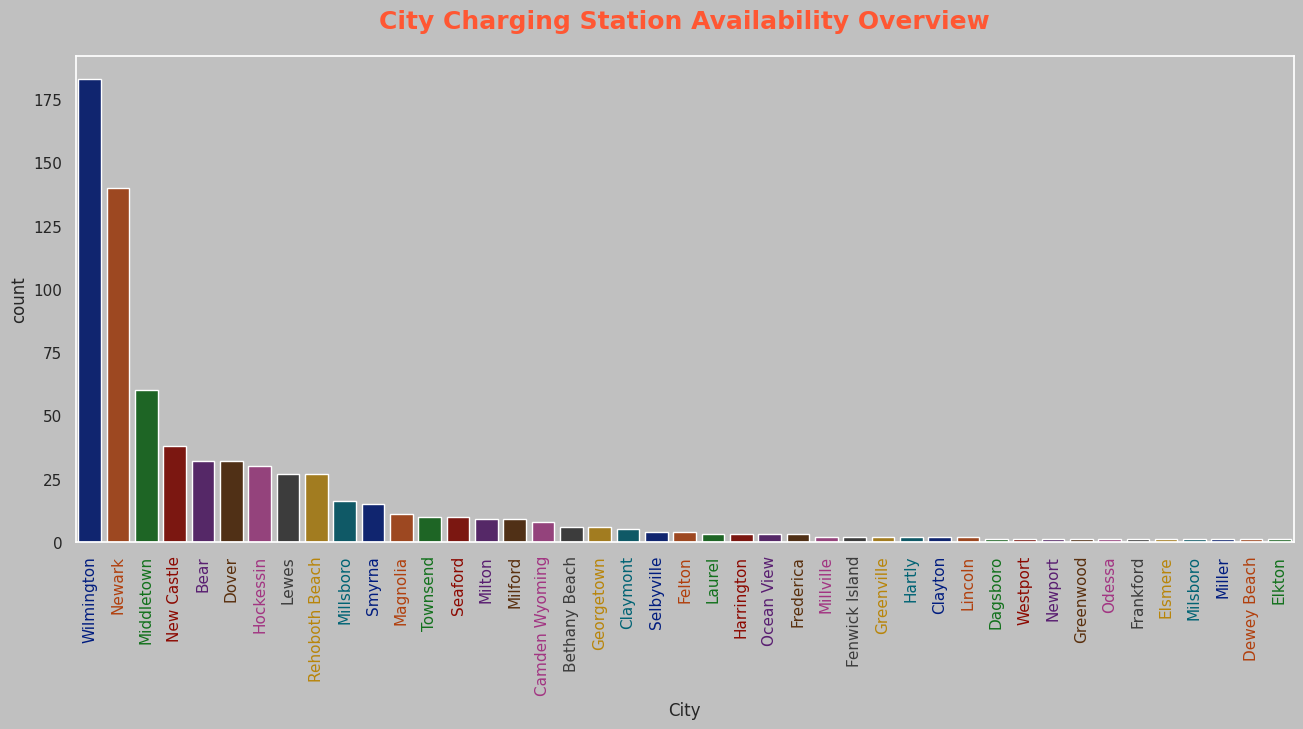

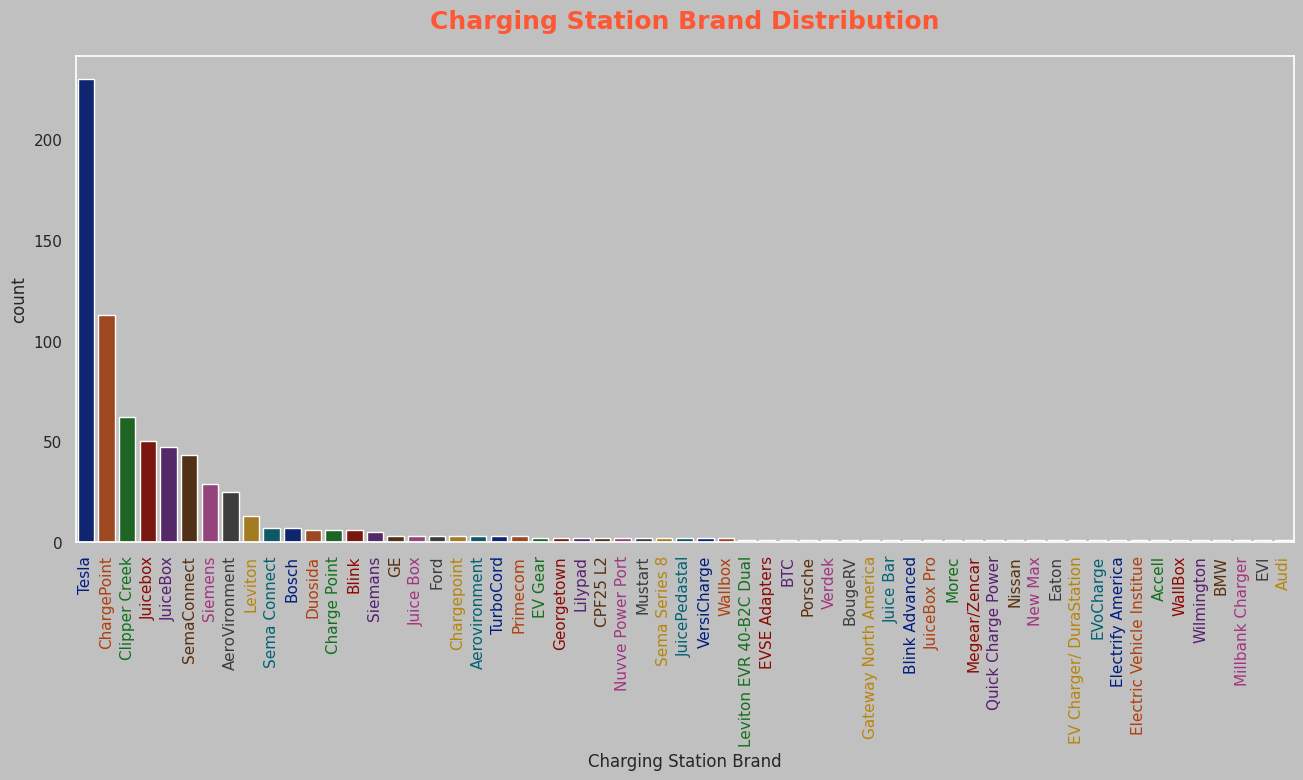

In [26]:
# Example usage:
title = 'City Charging Station Availability Overview'
plot_category_count(df, column_name='city', title=title)
# Example usage:
title = 'Charging Station Brand Distribution'
plot_category_count(df, column_name='charging_station_brand', title=title)

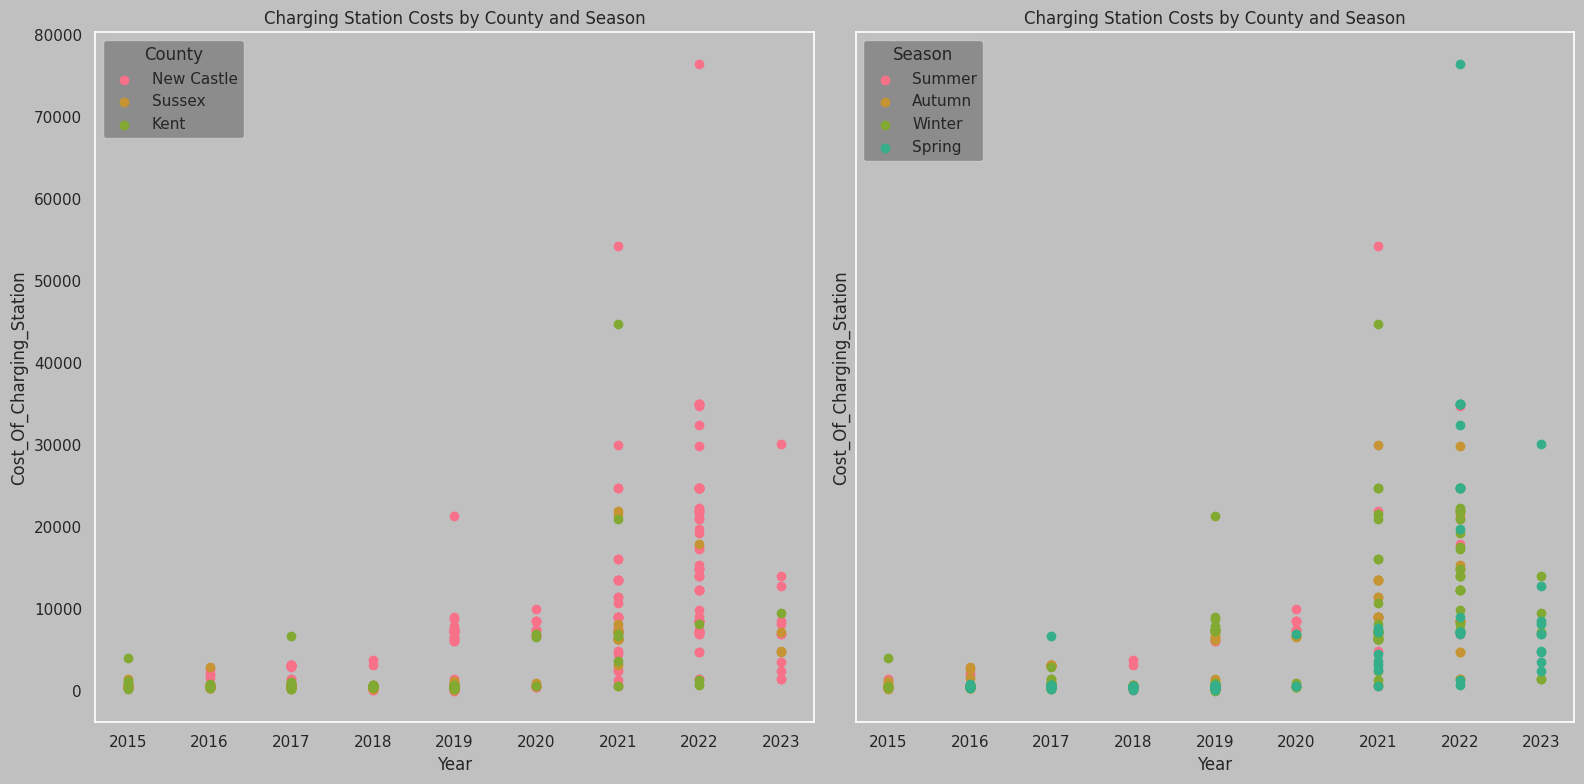

In [27]:
# Example usage
plot_scatter_by_category(df, 'year', 'cost_of_charging_station', ['county', 'season'], 'Charging Station Costs by County and Season')

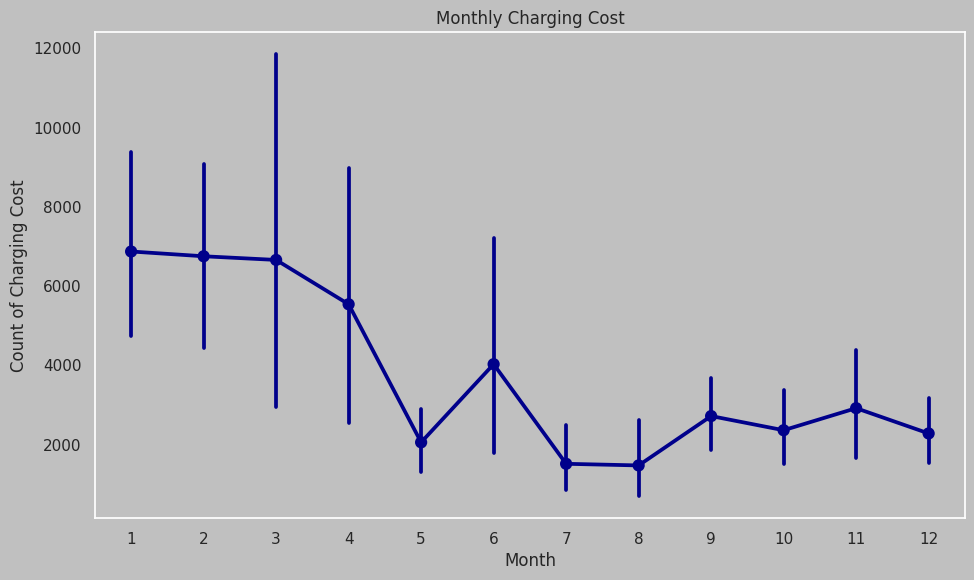

In [28]:
plt.figure(figsize=(10, 6), facecolor='silver')
sns.pointplot(x="month", y='cost_of_charging_station', data=df, color="darkblue")
plt.title('Monthly Charging Cost')
plt.xlabel('Month')
plt.ylabel('Count of Charging Cost')
plt.show()

In [29]:
def plot_by_year(df, x='', y='', title=''):
    plt.figure(figsize=(20, 8), facecolor='silver')

    # Lineplot
    plt.subplot(3, 1, 1, facecolor='silver')
    sns.lineplot(data=df, x=x, y=y, color="green")
    plt.title(f'Lineplot of {title}', color='black')  # Title with variable title
    plt.xlabel(x.replace('_', ' ').title())
    plt.ylabel(y.replace('_', ' ').title())

    # Pointplot
    plt.subplot(3, 1, 2, facecolor='silver')
    sns.pointplot(data=df, x=x, y=y, color="orange")
    plt.title(f'Pointplot of {title}', color='black')  # Title with variable title
    plt.xlabel(x.replace('_', ' ').title())
    plt.ylabel(y.replace('_', ' ').title())

    # Barplot
    plt.subplot(3, 1, 3, facecolor='silver')
    sns.barplot(data=df, x=x, y=y, palette="viridis")
    plt.title(f'Barplot of {title}', color='black')  # Title with variable title
    plt.xlabel(x.replace('_', ' ').title())
    plt.ylabel(y.replace('_', ' ').title())

    plt.tight_layout()
    plt.show()

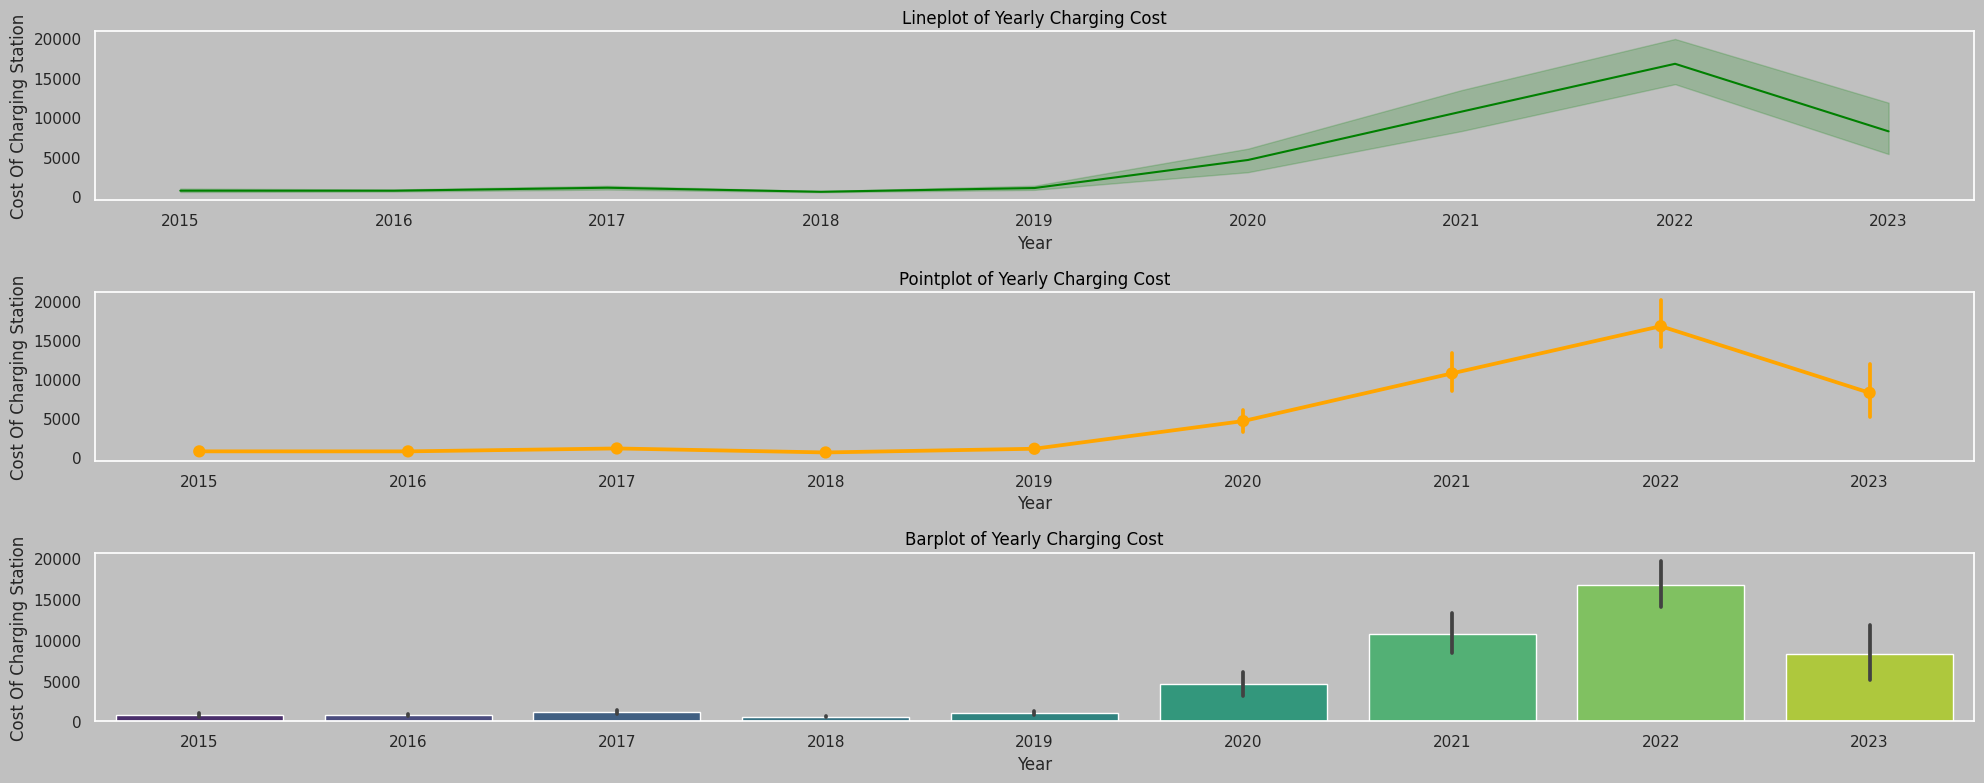

In [30]:
# Example usage
plot_by_year(df, x='year', y='cost_of_charging_station', title='Yearly Charging Cost')

In [31]:
def plot_by_unique(df, x='', y='', hue='', unique_columns='', title=''):
    for column_value in df[unique_columns].unique():
        plt.figure(figsize=(20, 6), facecolor='silver')
        
        # Plotting
        ax = sns.barplot(x=x, y=y, hue=hue, 
                         data=df[df[unique_columns] == column_value], ci=None, palette="Set1")

        plt.title(f'{title} by {hue} in {column_value} {unique_columns.title()}', color='black')  # Updated title
        plt.xlabel(x.replace('_', ' ').title())
        plt.ylabel(y.replace('_', ' ').title())

        plt.tight_layout()
        # Set legend facecolor to gray
        legend = ax.legend(facecolor='gray')
        plt.show()

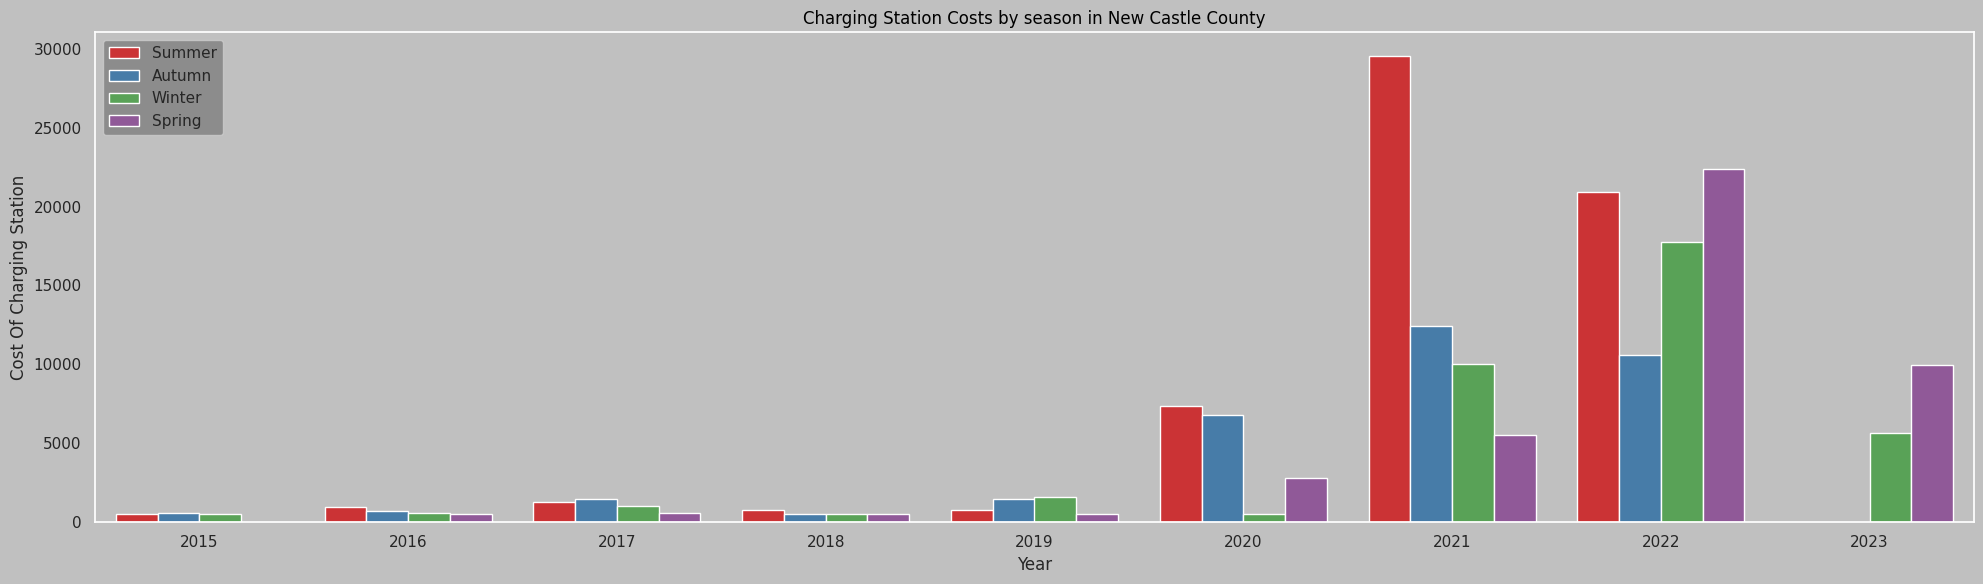

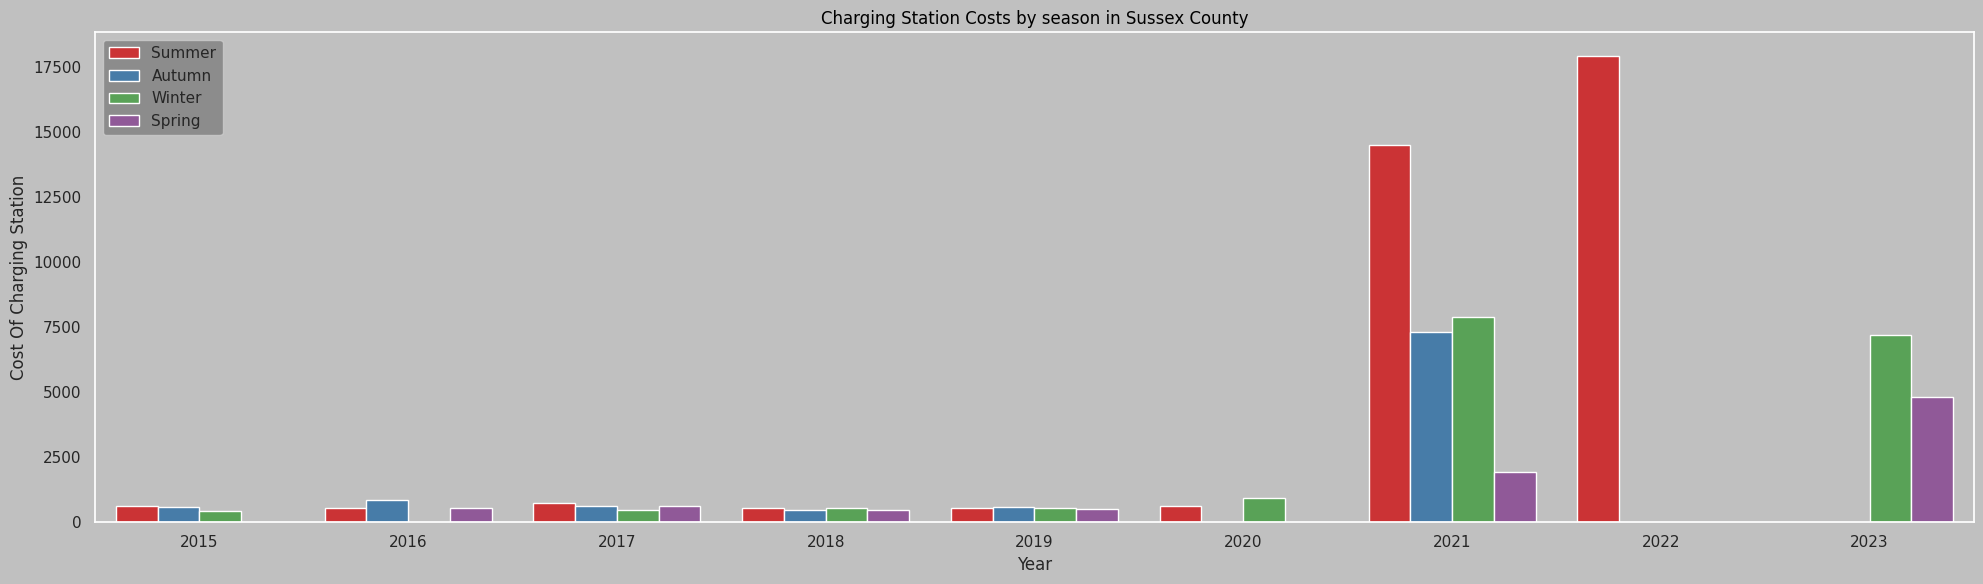

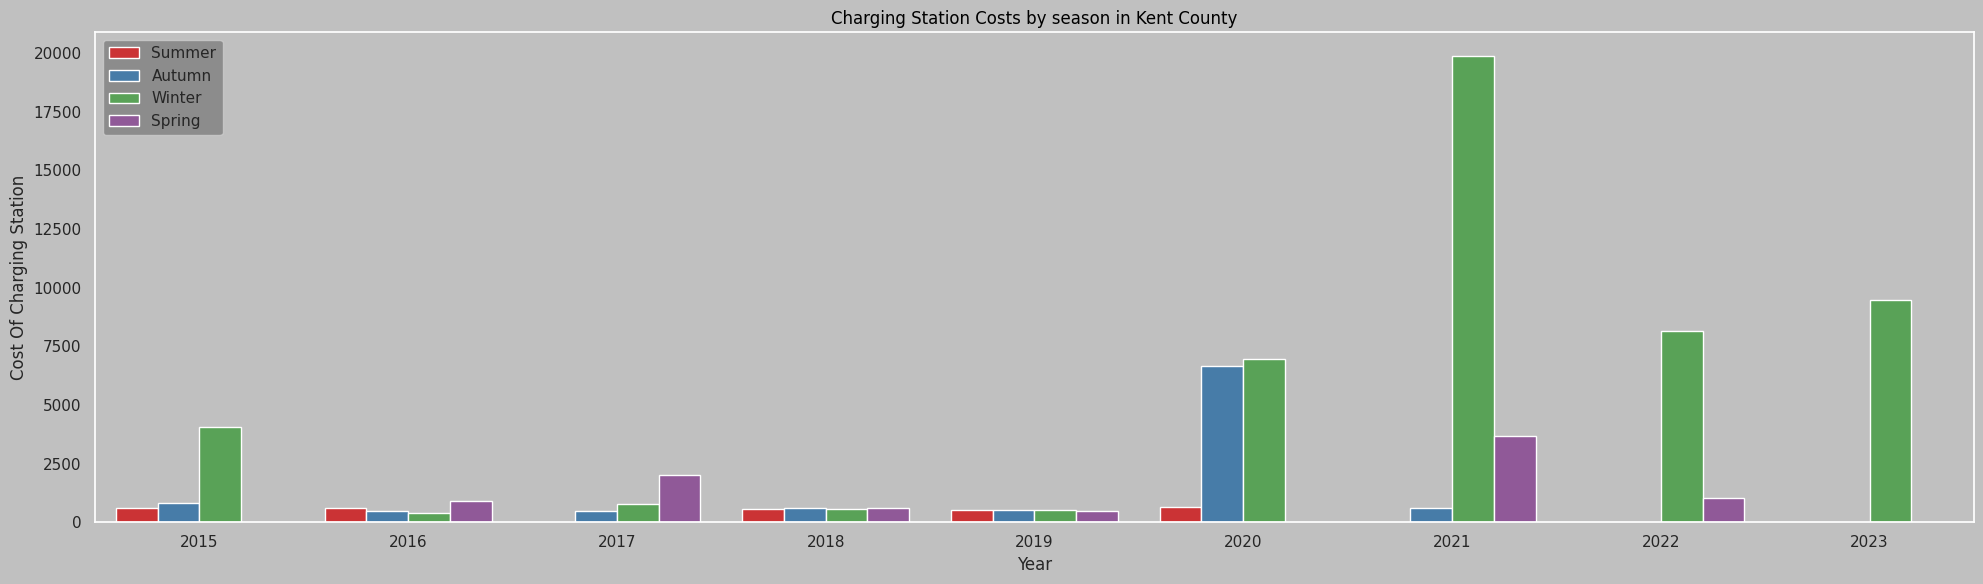

In [32]:
# Example usage
plot_by_unique(df, x='year', y='cost_of_charging_station', hue='season', unique_columns='county', title='Charging Station Costs')

In [33]:
def plot_costs(df, x='', y='', hue='', title=''):
    plt.figure(figsize=(14, 8), facecolor='silver')
    ax = sns.barplot(x=x, data=df, palette="muted", y=y, hue=hue, ci=None)
    plt.title(f'{title} by Season and County')
    plt.xlabel(x.replace('_', ' ').title())
    plt.ylabel(y.replace('_', ' ').title())

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.legend(title=hue.replace('_', ' ').title())
    # Set legend facecolor to gray
    legend = ax.legend(facecolor='gray')
    plt.show()

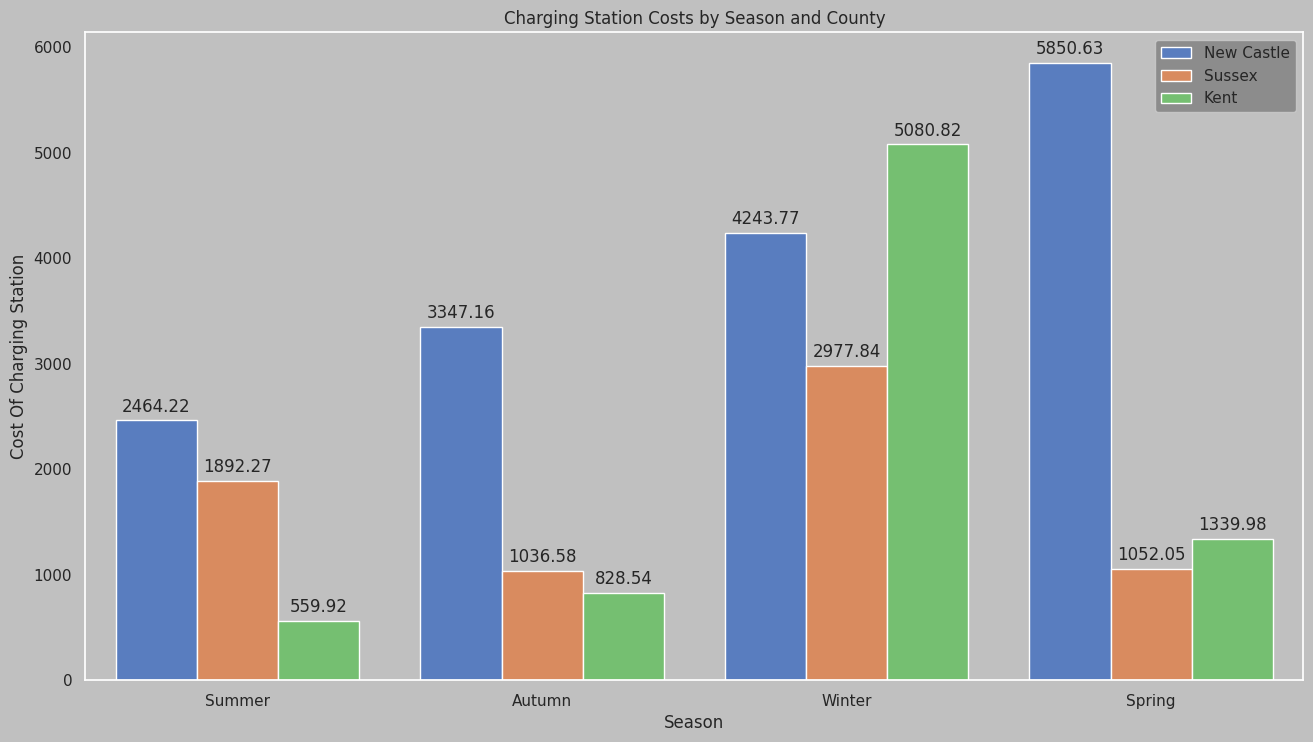

In [34]:
# Example usage
plot_costs(df, x = 'season', y='cost_of_charging_station', hue='county', title='Charging Station Costs')

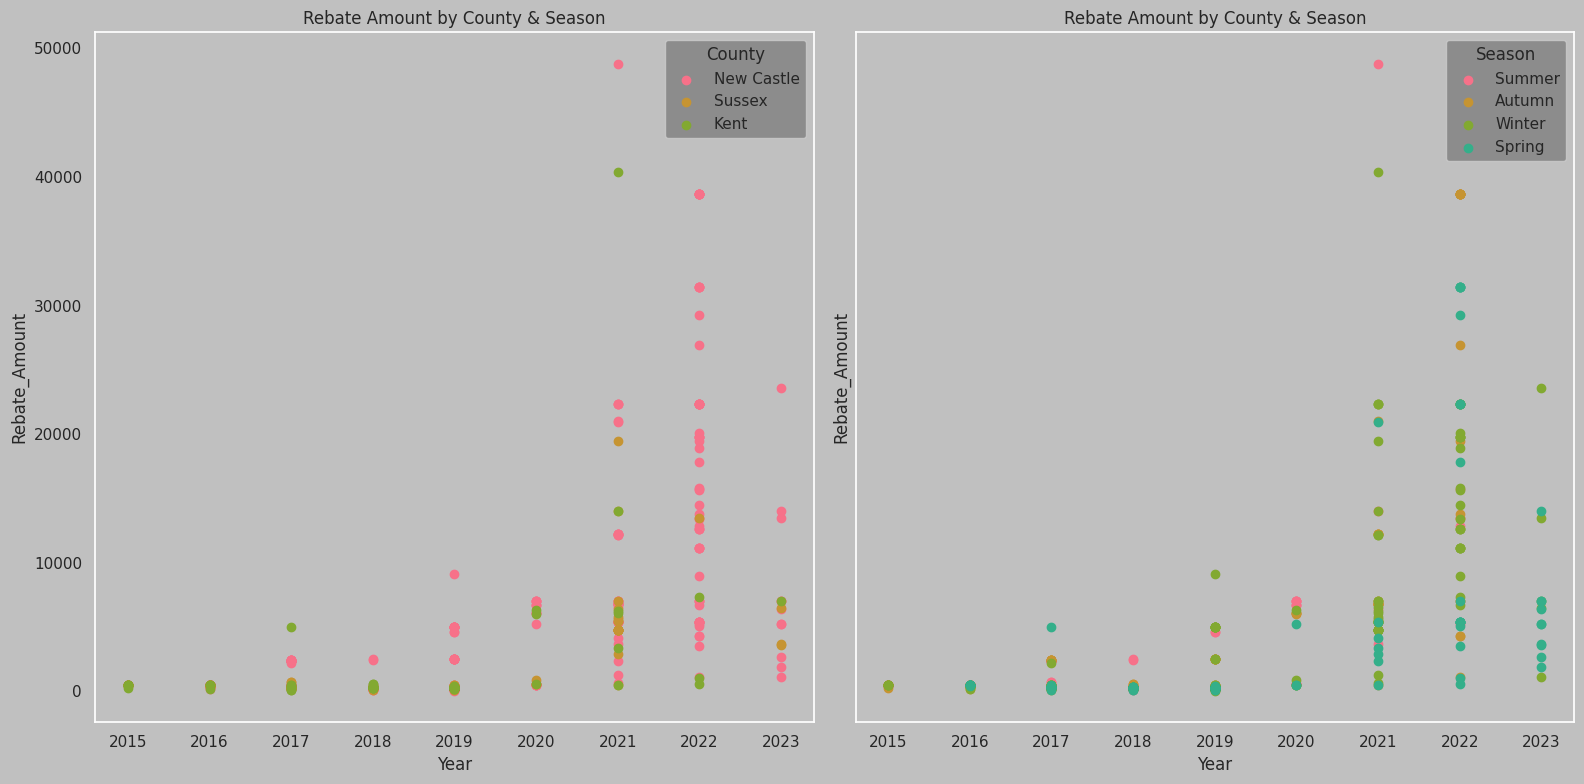

In [35]:
# Example usage
plot_scatter_by_category(df, 'year', 'rebate_amount', ['county', 'season'], 'Rebate Amount by County & Season')

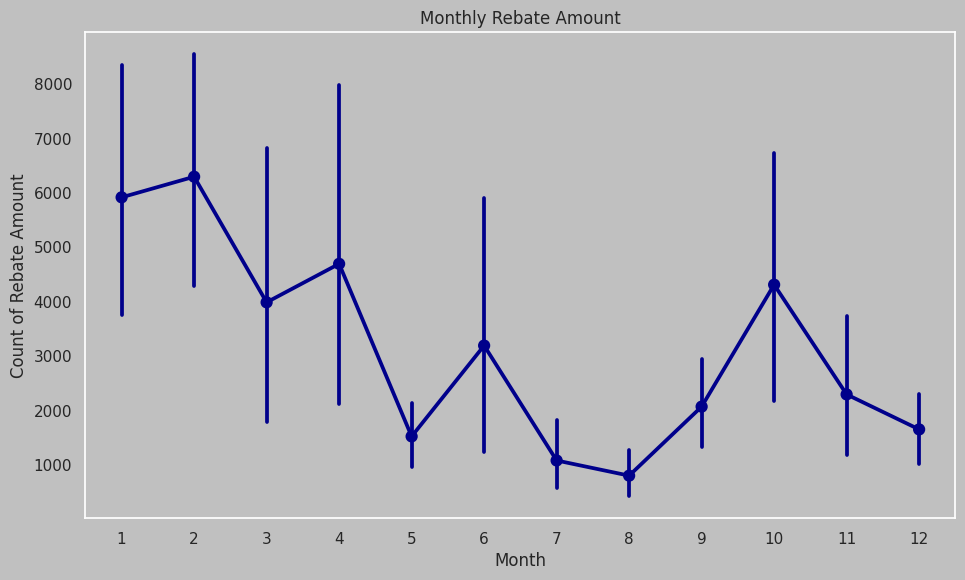

In [36]:
plt.figure(figsize=(10, 6), facecolor='silver')
sns.pointplot(x="month", y='rebate_amount', data=df, color="darkblue")
plt.title('Monthly Rebate Amount')
plt.xlabel('Month')
plt.ylabel('Count of Rebate Amount')
plt.show()

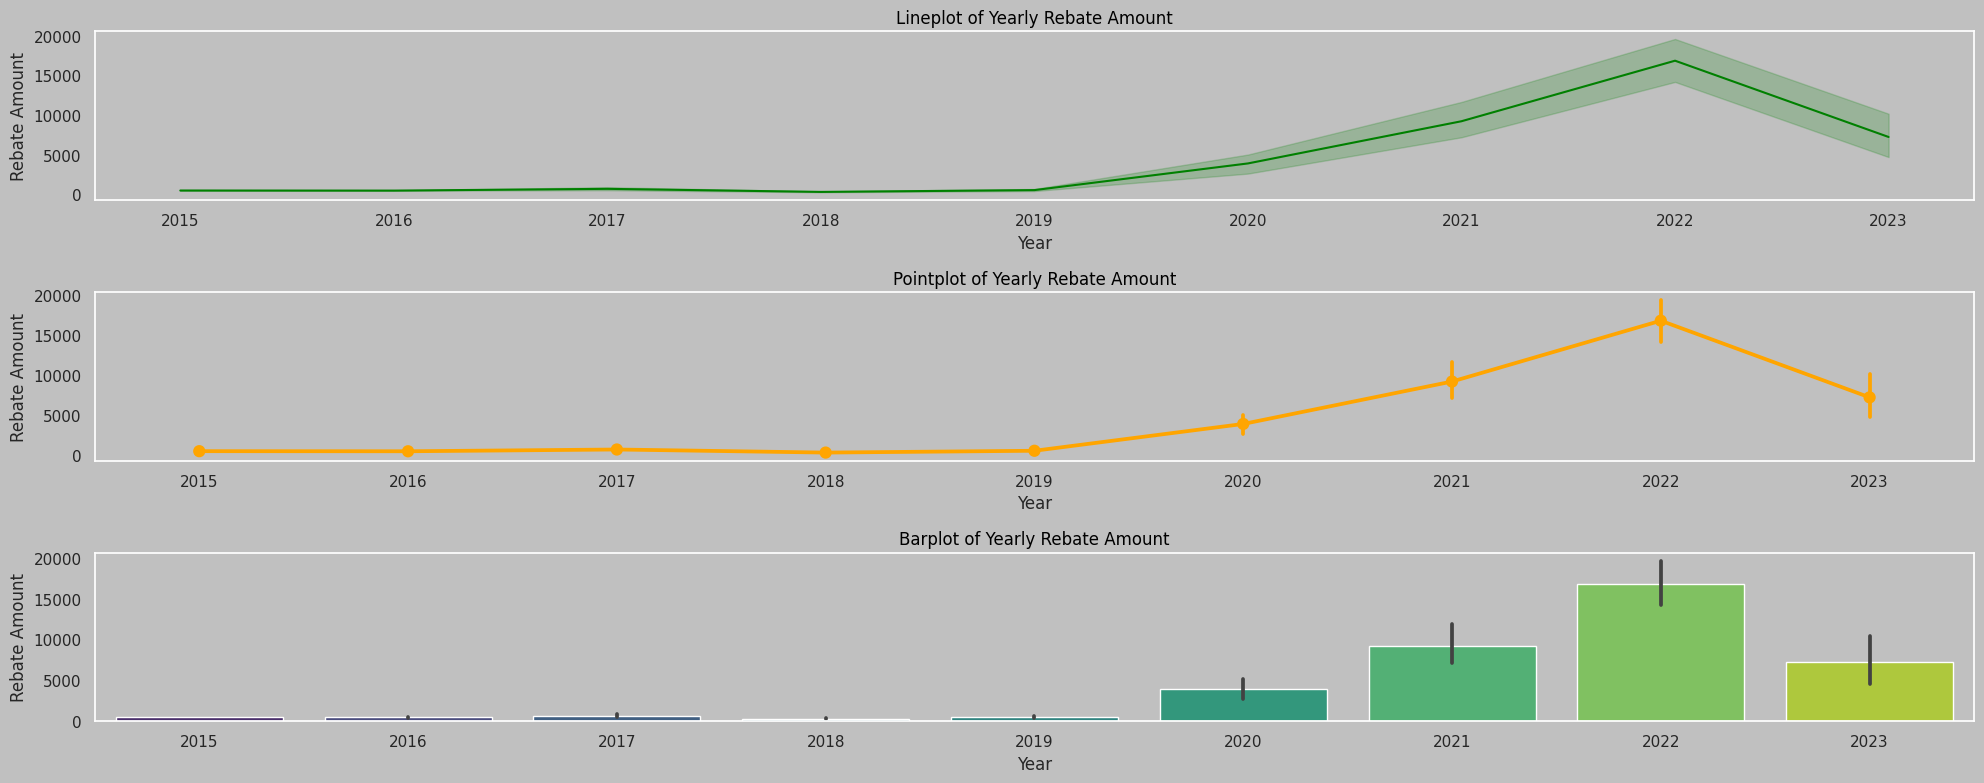

In [37]:
# Example usage
plot_by_year(df, x='year', y='rebate_amount', title='Yearly Rebate Amount')

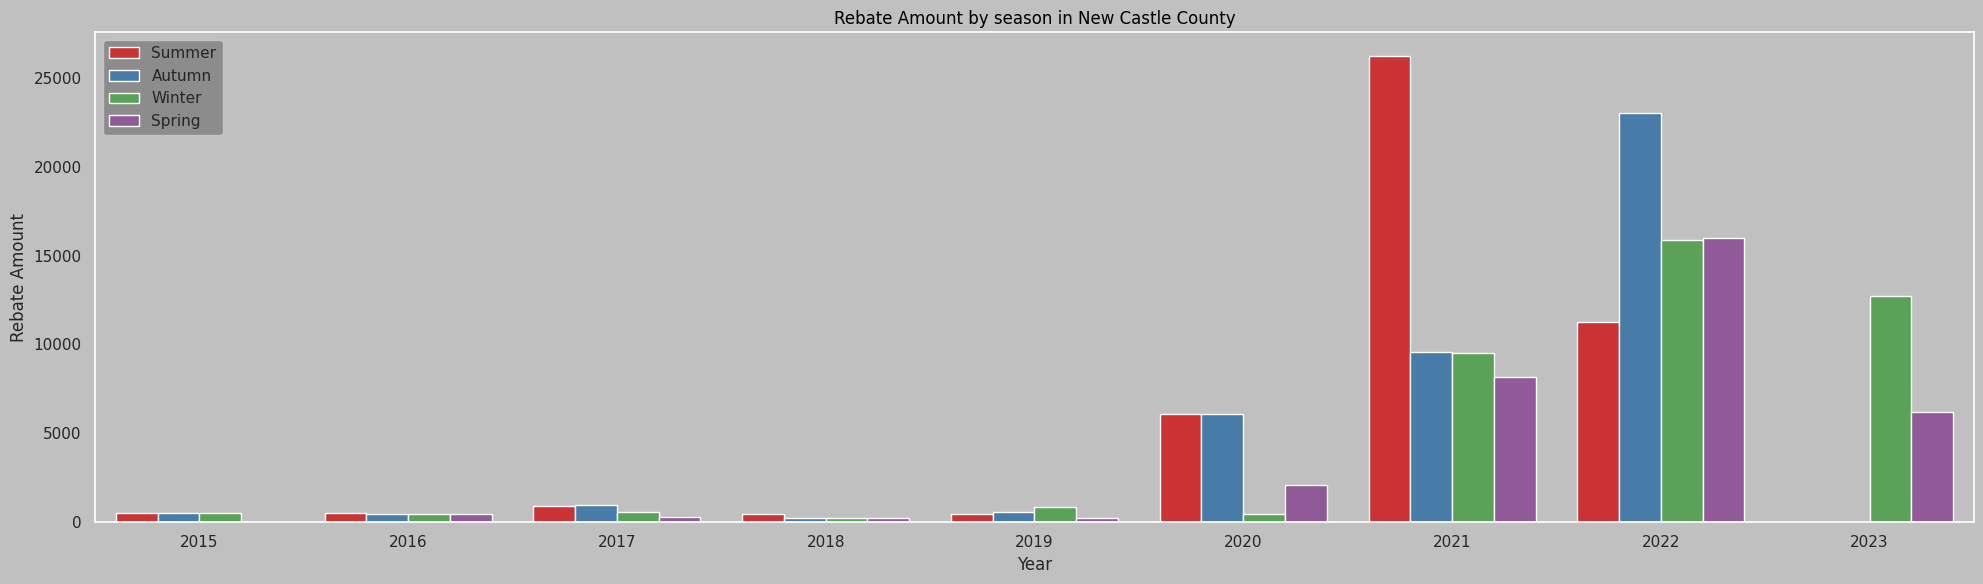

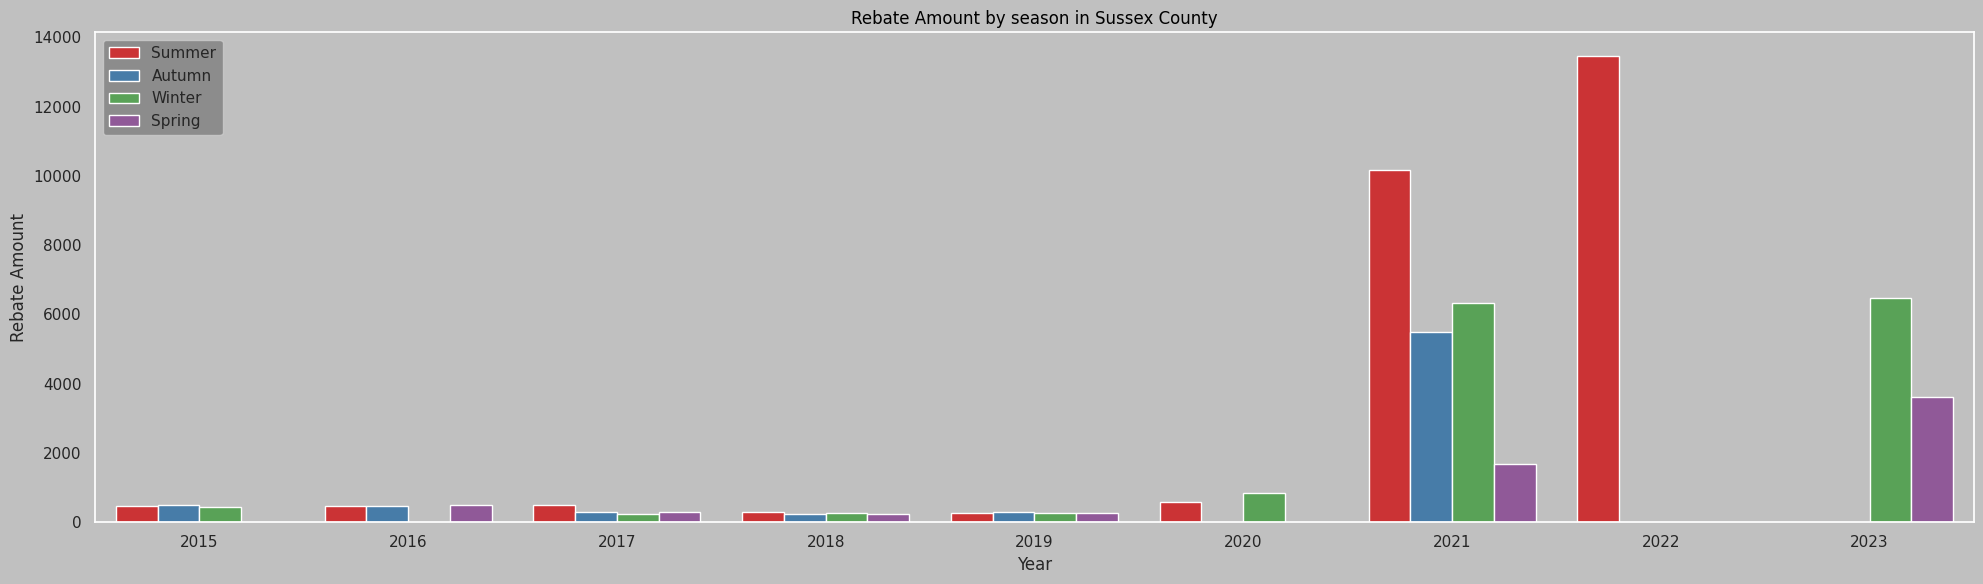

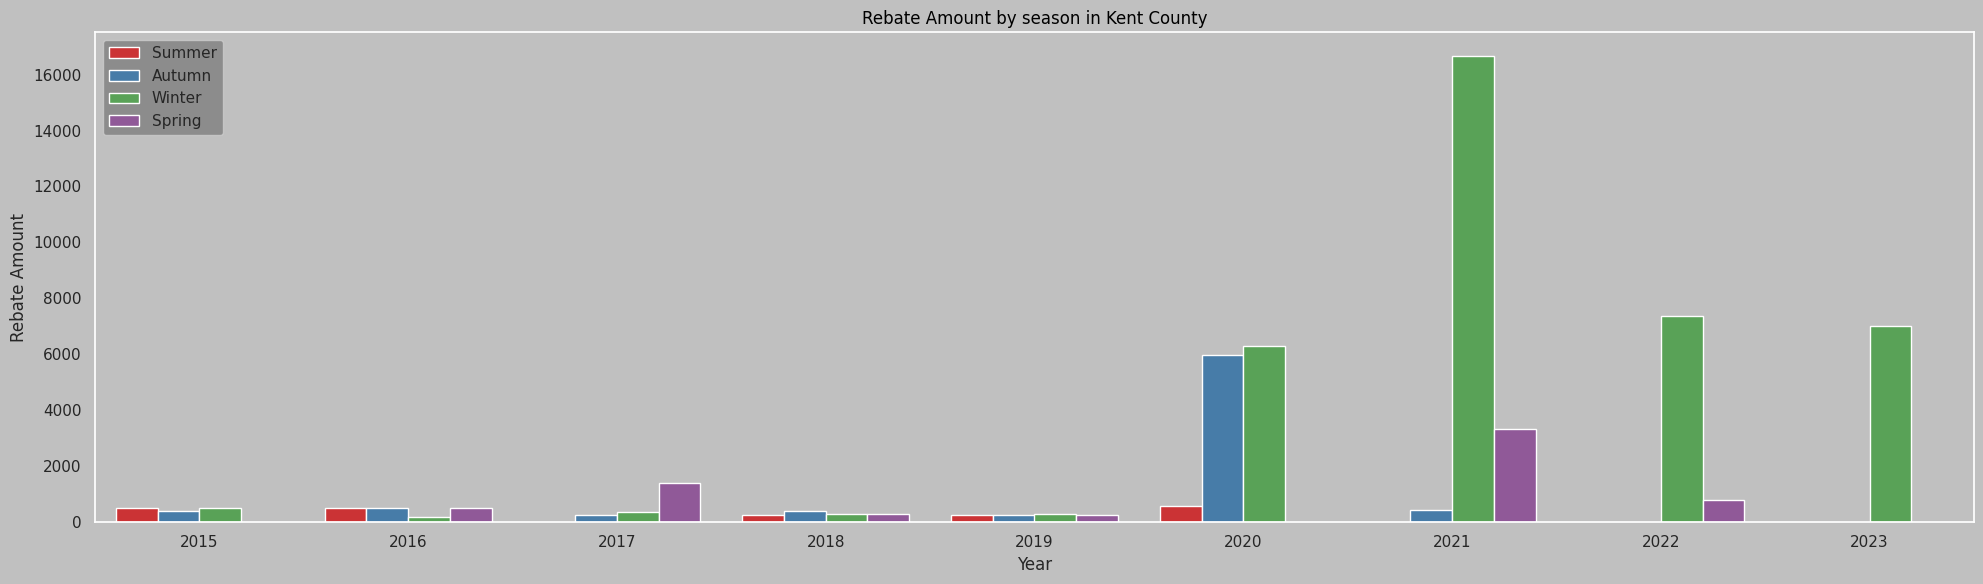

In [38]:
# Example usage
plot_by_unique(df, x='year', y='rebate_amount', hue='season', unique_columns='county', title='Rebate Amount')

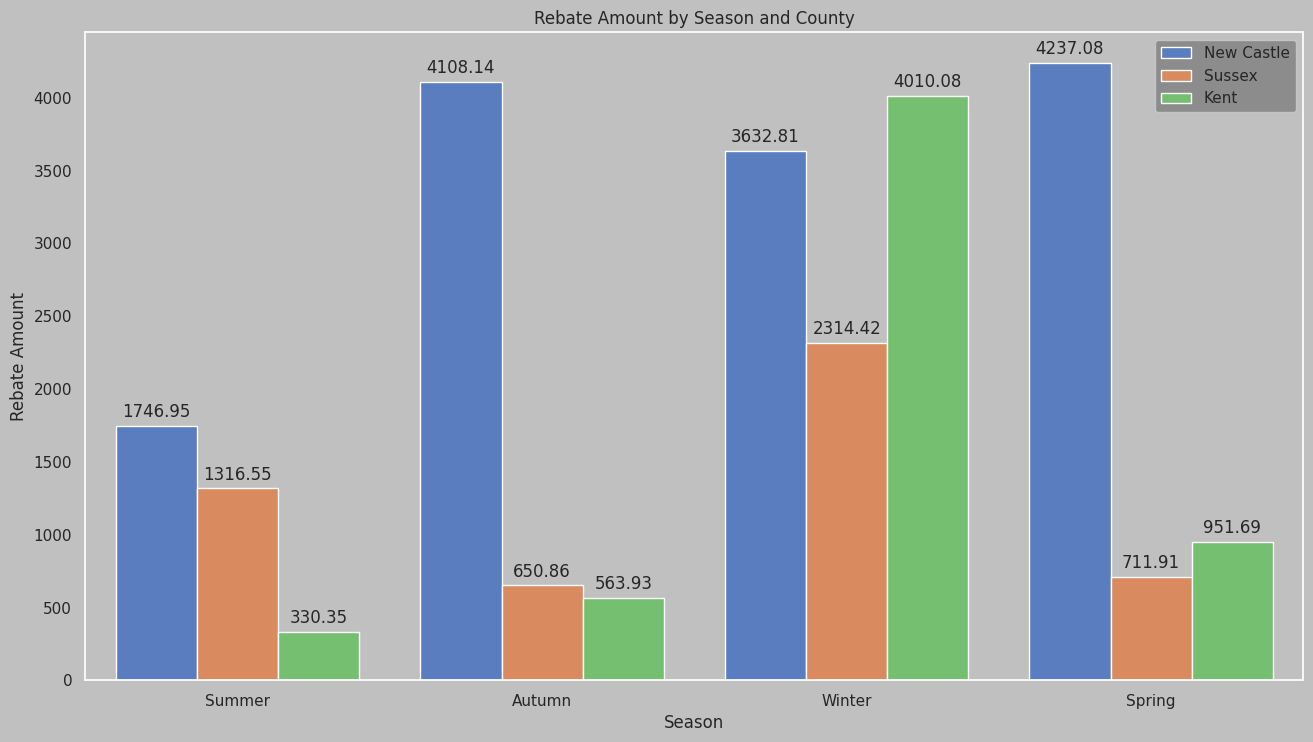

In [39]:
# Example usage
plot_costs(df, x = 'season', y='rebate_amount', hue='county', title='Rebate Amount')

<div style="margin: 0 auto; max-width: 800px;">
    <div style="background-image: url('https://i.postimg.cc/mkd3kfhV/cf90bb1b741ff44adde054a2e12b82e6.gif');
                background-size: contain; /* Changed background size */
                background-repeat: no-repeat; /* Prevent background image from repeating */
                background-position: left; /* Center the background image */
                padding: 50px;
                font-family: Arial, sans-serif; /* Changed font family */
                border: 4px solid #FF5733; /* Changed border color */
                border-radius: 20px;
                color: #DAA03DFF; /* Changed text color */
                text-align: right;
                box-shadow: 0px 8px 15px rgba(0, 0, 0, 0.4);
                animation: fadeIn 2s ease-in-out;">
        <h1 style="font-weight: bold; color: #FF5733;">Upvote, please ❔  Enjoyed : not</h1>
        <style>
            @keyframes fadeIn {
                from {
                    opacity: 0;
                }
                to {
                    opacity: 1;
                }
            }
            h1 {
                margin-top: 0;
                font-size: 48px;
                text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.6);
            }
        </style>
    </div>
</div>

<!-- Copyright@ https://www.kaggle.com/abdmental01 -->